In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("../dataset/대여소별_이용권비율.pkl","rb") as fr:
    df_station= pickle.load(fr)

In [3]:
df_station.head()

,station_id,19_week_daily,19_week_regular,19_hol_daily,19_hol_regular,20_week_daily,20_week_regular,20_hol_daily,20_hol_regular
0,1001,0.172905,0.827095,0.316646,0.683354,0.258624,0.741376,0.392308,0.607692
1,1002,0.183894,0.816106,0.356350,0.643650,0.283254,0.716746,0.454603,0.545397
2,1003,0.154073,0.845927,0.259140,0.740860,0.238314,0.761686,0.364192,0.635808
3,1004,0.172014,0.827986,0.301563,0.698438,0.272103,0.727897,0.428854,0.571146
4,1006,0.113201,0.886799,0.241314,0.758686,0.197472,0.802528,0.357414,0.642586


In [4]:
df_station.shape

(2183, 9)

In [5]:
sta_info=pd.read_csv('../dataset/con_sta_info.csv')
sta_info.head()

,ID,stationName,Y,X,Xn,Yn,Elev,BikeRoadNM,ToBikeRoad
0,101,101. (구)합정동 주민센터,37.549561,126.905754,947509.050934,1.950191e+06,9.152323,한강자전거길,771.0
1,102,102. 망원역 1번출구 앞,37.555649,126.910629,947943.924406,1.950863e+06,6.963737,홍제천자전거길,1065.0
2,103,103. 망원역 2번출구 앞,37.554951,126.910835,947961.634042,1.950786e+06,6.865565,한강자전거길,1146.0
3,104,104. 합정역 1번출구 앞,37.550629,126.914986,948325.239132,1.950304e+06,18.136753,한강자전거길,676.0
4,105,105. 합정역 5번출구 앞,37.550007,126.914825,948310.657239,1.950235e+06,17.498430,한강자전거길,962.0


In [6]:
id_info=sta_info['ID'].unique().tolist()
id_info=[str(i) for i in id_info]
id_info[:5]

['101', '102', '103', '104', '105']

In [7]:
df_station=df_station[df_station['station_id'].isin(id_info)].reset_index(drop=True)
df_station.head()

,station_id,19_week_daily,19_week_regular,19_hol_daily,19_hol_regular,20_week_daily,20_week_regular,20_hol_daily,20_hol_regular
0,1001,0.172905,0.827095,0.316646,0.683354,0.258624,0.741376,0.392308,0.607692
1,1002,0.183894,0.816106,0.356350,0.643650,0.283254,0.716746,0.454603,0.545397
2,1003,0.154073,0.845927,0.259140,0.740860,0.238314,0.761686,0.364192,0.635808
3,1004,0.172014,0.827986,0.301563,0.698438,0.272103,0.727897,0.428854,0.571146
4,1006,0.113201,0.886799,0.241314,0.758686,0.197472,0.802528,0.357414,0.642586


In [8]:
df_station.shape

(1527, 9)

In [9]:
df_station=df_station[['station_id','19_week_regular','19_hol_regular','20_week_regular','20_hol_regular']]
df_station.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular
0,1001,0.827095,0.683354,0.741376,0.607692
1,1002,0.816106,0.643650,0.716746,0.545397
2,1003,0.845927,0.740860,0.761686,0.635808
3,1004,0.827986,0.698438,0.727897,0.571146
4,1006,0.886799,0.758686,0.802528,0.642586


In [10]:
df_station['week_diff']=abs(df_station['20_week_regular']-df_station['19_week_regular'])
df_station['hol_diff']=abs(df_station['20_hol_regular']-df_station['19_hol_regular'])

df_station.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular,week_diff,hol_diff
0,1001,0.827095,0.683354,0.741376,0.607692,0.085718,0.075662
1,1002,0.816106,0.643650,0.716746,0.545397,0.099361,0.098253
2,1003,0.845927,0.740860,0.761686,0.635808,0.084241,0.105052
3,1004,0.827986,0.698438,0.727897,0.571146,0.100089,0.127291
4,1006,0.886799,0.758686,0.802528,0.642586,0.084271,0.116101


In [11]:
df_station_over10_week=df_station[df_station['week_diff'] >= 0.1].reset_index(drop=True)
df_station_over10_week.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular,week_diff,hol_diff
0,1004,0.827986,0.698438,0.727897,0.571146,0.100089,0.127291
1,1037,0.875576,0.718480,0.754647,0.580175,0.120929,0.138305
2,1038,0.863354,0.727651,0.749175,0.541885,0.114179,0.185766
3,1039,0.893796,0.803874,0.746988,0.678715,0.146808,0.125159
4,1052,0.879576,0.784854,0.727034,0.633603,0.152542,0.151250


In [12]:
df_station_over10_hol=df_station[df_station['hol_diff']>=0.1].reset_index(drop=True)
df_station_over10_hol.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular,week_diff,hol_diff
0,1003,0.845927,0.740860,0.761686,0.635808,0.084241,0.105052
1,1004,0.827986,0.698438,0.727897,0.571146,0.100089,0.127291
2,1006,0.886799,0.758686,0.802528,0.642586,0.084271,0.116101
3,1008,0.840521,0.706719,0.757255,0.596122,0.083266,0.110597
4,1016,0.842795,0.725989,0.755008,0.591248,0.087787,0.134741


### 19년도 기준, 기존 이용권 비율 정도 확인

In [13]:
df_station_over10_week=df_station_over10_week[['station_id','19_week_regular','20_week_regular','week_diff']]
df_station_over10_hol=df_station_over10_hol[['station_id','19_hol_regular','20_hol_regular','hol_diff']]

In [14]:
df_station_over10_week.head()

,station_id,19_week_regular,20_week_regular,week_diff
0,1004,0.827986,0.727897,0.100089
1,1037,0.875576,0.754647,0.120929
2,1038,0.863354,0.749175,0.114179
3,1039,0.893796,0.746988,0.146808
4,1052,0.879576,0.727034,0.152542


In [15]:
df_station_over10_week.shape

(148, 4)

In [16]:
df_station_over10_hol.head()

,station_id,19_hol_regular,20_hol_regular,hol_diff
0,1003,0.740860,0.635808,0.105052
1,1004,0.698438,0.571146,0.127291
2,1006,0.758686,0.642586,0.116101
3,1008,0.706719,0.596122,0.110597
4,1016,0.725989,0.591248,0.134741


In [17]:
df_station_over10_hol.shape

(315, 4)

### 19년도 주중 확인

In [18]:
df_station_over10_week['19_week_regular'].describe()

count    148.000000
mean       0.810431
std        0.082646
min        0.536843
25%        0.784306
50%        0.828451
75%        0.864468
max        0.930837
Name: 19_week_regular, dtype: float64

#### 19년도 주중

- 최소값  : 0.54
- 1분위수 : 0.79
- 2분위수 : 0.83
- 3분위수 : 0.86
- 최대값  : 0.93

---
1) value < 0.6   
2) 0.6 <= value < 0.7   
3) 0.7 <= value < 0.8  
4) 0.8 <= value < 0.9  
5) 0.9 <= value < 1.0  

구간을 나눠서 확인

In [19]:
def make_interval(value):
    if value < 0.6:
        return '1'
    elif 0.6<= value <0.7:
        return '2'
    elif 0.7<= value <0.8:
        return '3'
    elif 0.8<= value <0.9:
        return '4'
    else:
        return '5'

In [20]:
df_station_over10_week['interval']=df_station_over10_week['19_week_regular'].apply(lambda x:make_interval(x))
df_station_over10_week.head()

,station_id,19_week_regular,20_week_regular,week_diff,interval
0,1004,0.827986,0.727897,0.100089,4
1,1037,0.875576,0.754647,0.120929,4
2,1038,0.863354,0.749175,0.114179,4
3,1039,0.893796,0.746988,0.146808,4
4,1052,0.879576,0.727034,0.152542,4


In [21]:
df_station_over10_week['interval'].value_counts()

4    86
3    34
2    12
5    12
1     4
Name: interval, dtype: int64

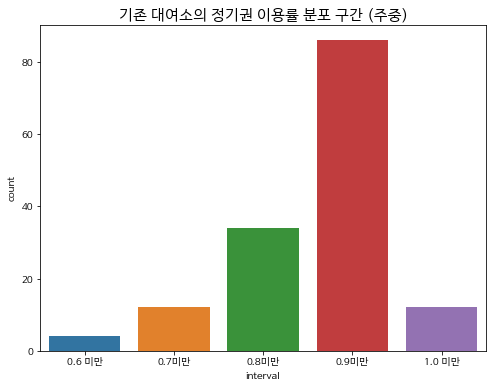

In [22]:
plt.rcParams['font.family']="Hancom Gothic"

plt.figure(figsize=(8,6))
sns.countplot(df_station_over10_week['interval'])
plt.title('기존 대여소의 정기권 이용률 분포 구간 (주중)',fontsize=15)
plt.xticks([0,1,2,3,4],['0.6 미만','0.7미만','0.8미만','0.9미만','1.0 미만'])
plt.show()

### 19년도 주말 확인

In [23]:
df_station_over10_hol['19_hol_regular'].describe()

count    315.000000
mean       0.725519
std        0.080539
min        0.379399
25%        0.685724
50%        0.735557
75%        0.776632
max        0.958904
Name: 19_hol_regular, dtype: float64

#### 19년도 주말

- 최소값  : 0.38
- 1분위수 : 0.69
- 2분위수 : 0.75
- 3분위수 : 0.78
- 최대값  : 0.96

---
1) value < 0.6   
2) 0.6 <= value < 0.7   
3) 0.7 <= value < 0.8  
4) 0.8 <= value < 0.9  
5) 0.9 <= value < 1.0  

구간을 나눠서 확인

In [24]:
df_station_over10_hol['interval']=df_station_over10_hol['19_hol_regular'].apply(lambda x:make_interval(x))
df_station_over10_hol.head()

,station_id,19_hol_regular,20_hol_regular,hol_diff,interval
0,1003,0.740860,0.635808,0.105052,3
1,1004,0.698438,0.571146,0.127291,2
2,1006,0.758686,0.642586,0.116101,3
3,1008,0.706719,0.596122,0.110597,3
4,1016,0.725989,0.591248,0.134741,3


In [25]:
df_station_over10_hol['interval'].value_counts()

3    167
2     77
4     47
1     23
5      1
Name: interval, dtype: int64

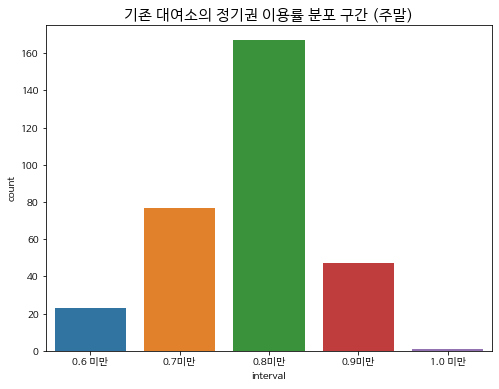

In [26]:
plt.rcParams['font.family']="Hancom Gothic"

plt.figure(figsize=(8,6))
sns.countplot(df_station_over10_hol['interval'])
plt.title('기존 대여소의 정기권 이용률 분포 구간 (주말)',fontsize=15)
plt.xticks([0,1,2,3,4],['0.6 미만','0.7미만','0.8미만','0.9미만','1.0 미만'])
plt.show()

### 주변환경데이터 / 인구데이터 병합

In [27]:
environ=pd.read_csv('../dataset/collected_data.csv')
population=pd.read_csv('../dataset/final_result.csv')

In [28]:
environ.head()

,ID,food,cafe,tour,bank,num_of_sta,uni_dist
0,101,27,11,1,1,0.0,1727.445882
1,102,141,57,0,8,1.0,1312.952825
2,103,132,49,0,8,1.0,1276.796875
3,104,268,86,0,13,1.0,906.704926
4,105,343,94,0,14,2.0,938.661548


In [29]:
population.head()

,ID,tot_pop,saup,jong,2049,single,y_ratio,one_ratio,tot_ga
0,101,3119.308642,82.687420,905.496981,1783.264692,629.216224,0.571686,0.415103,1515.808533
1,102,5553.265017,585.298449,5327.718891,3191.545510,1399.156993,0.574715,0.485508,2881.841910
2,103,5347.571669,552.451941,4852.300334,3055.182027,1312.241227,0.571321,0.477412,2748.655612
3,104,3746.554975,1015.973100,7884.476026,2009.505848,776.205709,0.536361,0.429680,1806.472361
4,105,3603.847069,1029.199546,7764.478220,1876.293354,691.128573,0.520636,0.408744,1690.860188


In [30]:
population=population.drop(['tot_ga'], axis=1)
population.head()

,ID,tot_pop,saup,jong,2049,single,y_ratio,one_ratio
0,101,3119.308642,82.687420,905.496981,1783.264692,629.216224,0.571686,0.415103
1,102,5553.265017,585.298449,5327.718891,3191.545510,1399.156993,0.574715,0.485508
2,103,5347.571669,552.451941,4852.300334,3055.182027,1312.241227,0.571321,0.477412
3,104,3746.554975,1015.973100,7884.476026,2009.505848,776.205709,0.536361,0.429680
4,105,3603.847069,1029.199546,7764.478220,1876.293354,691.128573,0.520636,0.408744


In [31]:
env_pop=pd.merge(environ, population, how='inner', on='ID')
env_pop.head()

,ID,food,cafe,tour,bank,num_of_sta,uni_dist,tot_pop,saup,jong,2049,single,y_ratio,one_ratio
0,101,27,11,1,1,0.0,1727.445882,3119.308642,82.687420,905.496981,1783.264692,629.216224,0.571686,0.415103
1,102,141,57,0,8,1.0,1312.952825,5553.265017,585.298449,5327.718891,3191.545510,1399.156993,0.574715,0.485508
2,103,132,49,0,8,1.0,1276.796875,5347.571669,552.451941,4852.300334,3055.182027,1312.241227,0.571321,0.477412
3,104,268,86,0,13,1.0,906.704926,3746.554975,1015.973100,7884.476026,2009.505848,776.205709,0.536361,0.429680
4,105,343,94,0,14,2.0,938.661548,3603.847069,1029.199546,7764.478220,1876.293354,691.128573,0.520636,0.408744


In [39]:
env_pop['station_id']=env_pop['ID'].apply(lambda x:str(x))

In [41]:
df_station_over10_week=pd.merge(left=df_station_over10_week, right=env_pop, on='station_id')
df_station_over10_week.head()

,station_id,19_week_regular,20_week_regular,week_diff,interval,ID,food,cafe,tour,bank,num_of_sta,uni_dist,tot_pop,saup,jong,2049,single,y_ratio,one_ratio
0,1004,0.827986,0.727897,0.100089,4,1004,124,14,0,5,0.0,2156.277683,8431.053773,440.527597,2646.223466,3831.310038,1005.127237,0.454428,0.288021
1,1037,0.875576,0.754647,0.120929,4,1037,3,0,0,0,1.0,6218.869173,3563.229927,25.943034,444.589796,1391.924596,387.396174,0.390636,0.266782
2,1038,0.863354,0.749175,0.114179,4,1038,1,1,0,1,1.0,6510.408103,4607.195129,12.514491,237.117241,1888.030940,193.824629,0.409801,0.122867
3,1039,0.893796,0.746988,0.146808,4,1039,14,4,0,1,1.0,5583.409184,2218.605497,32.592930,265.675310,803.740038,389.122416,0.362273,0.382283
4,1052,0.879576,0.727034,0.152542,4,1052,5,2,0,5,1.0,4615.530510,2628.717465,98.217631,795.728570,1357.439462,176.806788,0.516388,0.190520


In [42]:
df_station_over10_hol=pd.merge(left=df_station_over10_hol, right=env_pop, on='station_id')
df_station_over10_hol.head()

,station_id,19_hol_regular,20_hol_regular,hol_diff,interval,ID,food,cafe,tour,bank,num_of_sta,uni_dist,tot_pop,saup,jong,2049,single,y_ratio,one_ratio
0,1003,0.740860,0.635808,0.105052,3,1003,68,7,2,6,2.0,1950.674105,5522.674667,221.289537,1655.893618,2428.209864,788.621991,0.439680,0.334952
1,1004,0.698438,0.571146,0.127291,2,1004,124,14,0,5,0.0,2156.277683,8431.053773,440.527597,2646.223466,3831.310038,1005.127237,0.454428,0.288021
2,1006,0.758686,0.642586,0.116101,3,1006,34,11,0,5,0.0,3395.852217,7972.748264,303.582042,1301.788543,3431.888395,283.177238,0.430452,0.106559
3,1008,0.706719,0.596122,0.110597,3,1008,194,38,0,13,0.0,1978.007334,6355.293220,679.213545,3257.025874,3089.650309,1131.787180,0.486154,0.386280
4,1016,0.725989,0.591248,0.134741,3,1016,47,9,0,3,1.0,5587.427802,4440.196562,160.277341,584.312842,1709.139480,308.220946,0.384924,0.197359


In [43]:
df_station_over10_week.drop(['ID'], axis=1, inplace=True)
df_station_over10_hol.drop(['ID'], axis=1, inplace=True)

In [48]:
df_station_over10_week.drop(['19_week_regular','20_week_regular','week_diff'], axis=1, inplace=True)
df_station_over10_hol.drop(['19_hol_regular','20_hol_regular','hol_diff'], axis=1, inplace=True)

### 주중 인터벌 확인

In [56]:
df_station_over10_week.head()

,station_id,interval,food,cafe,tour,bank,num_of_sta,uni_dist,tot_pop,saup,jong,2049,single,y_ratio,one_ratio
0,1004,4,124,14,0,5,0.0,2156.277683,8431.053773,440.527597,2646.223466,3831.310038,1005.127237,0.454428,0.288021
1,1037,4,3,0,0,0,1.0,6218.869173,3563.229927,25.943034,444.589796,1391.924596,387.396174,0.390636,0.266782
2,1038,4,1,1,0,1,1.0,6510.408103,4607.195129,12.514491,237.117241,1888.030940,193.824629,0.409801,0.122867
3,1039,4,14,4,0,1,1.0,5583.409184,2218.605497,32.592930,265.675310,803.740038,389.122416,0.362273,0.382283
4,1052,4,5,2,0,5,1.0,4615.530510,2628.717465,98.217631,795.728570,1357.439462,176.806788,0.516388,0.190520


In [63]:
def interval_describe(df):
    columns=df.columns
    
    for i in range(2,len(columns)):
        column=columns[i]
        print('■■■■■ '+str(column)+' ■■■■■')
        print(df.groupby('interval')[column].describe())

In [60]:
interval_describe(df_station_over10_week)

■■■■■food■■■■■
          count       mean        std   min    25%   50%    75%    max
interval                                                              
1           4.0  30.000000  15.033296  13.0  19.75  31.0  41.25   45.0
2          12.0  30.583333  29.892104   2.0   7.00  17.0  45.50   86.0
3          34.0  43.617647  45.465281   0.0   5.25  25.0  70.25  163.0
4          86.0  37.406977  42.715303   0.0   6.00  28.0  54.50  197.0
5          12.0  27.500000  27.625746   0.0   4.00  17.0  45.25   76.0
■■■■■cafe■■■■■
          count      mean        std  min   25%  50%    75%   max
interval                                                         
1           4.0  8.750000   5.909033  3.0  6.00  7.5  10.25  17.0
2          12.0  8.916667  13.255931  0.0  1.00  2.5  10.25  45.0
3          34.0  8.029412   7.420223  0.0  1.00  6.5  11.00  27.0
4          86.0  7.848837   9.132383  0.0  2.00  4.5  11.00  51.0
5          12.0  5.583333   4.776045  0.0  1.75  4.5   9.75  13.0
■■■■■tour■■

5         0.489259  


- tot pop : 총인구
- saup : 사업체수
- jong : 종사자수
- 2049: 20~40세 인구
- single: 1인가구수
- y ratio : 20~49세 인구비율
- one_ratio : 1인가구 비율

In [62]:
interval_describe(df_station_over10_hol)

■■■■■food■■■■■
          count       mean        std  min   25%   50%    75%    max
interval                                                            
1          23.0  65.391304  92.068028  0.0   5.0  14.0  103.0  332.0
2          77.0  57.116883  70.740998  0.0   7.0  34.0   86.0  451.0
3         167.0  52.994012  70.729972  0.0   8.0  32.0   64.5  415.0
4          47.0  35.404255  34.951929  0.0  10.5  20.0   58.5  129.0
5           1.0   7.000000        NaN  7.0   7.0   7.0    7.0    7.0
■■■■■cafe■■■■■
          count       mean        std  min  25%  50%   75%    max
interval                                                         
1          23.0  17.652174  28.730106  0.0  1.0  8.0  18.5  122.0
2          77.0  11.974026  13.751530  0.0  2.0  6.0  19.0   67.0
3         167.0  11.191617  15.378335  0.0  2.0  7.0  14.0  125.0
4          47.0   7.446809   8.040140  0.0  2.5  6.0   9.0   42.0
5           1.0   3.000000        NaN  3.0  3.0  3.0   3.0    3.0
■■■■■tour■■■■■
          